Maximum Likelihood Estimation (MLE)
- 최대 가능도(우도) 추정
  - 압정을 던졌을 때 두가지 Class가 존재함 (뒤집어지거나 옆으로 뉘거나)
  - 이를 베르누이 분포(이항 분포)라고 함 (class 0, class 1)
  - 100번을 던졌을때, 
    - n = 100
    - k = 27 (뒤집어진 횟수) 
    - $ K \sim B(n, \theta) $ (observation)
  - $ P(K = k) = \binom{n}{k} \theta^k (1 - \theta)^{n-k} $
  - $=\frac{n!}{k!(n - k)!} \cdot\theta^{k}(1 - \theta)^{n-k} $
  - $=F(\theta)$ 함수를 만들 수 있음. n=100, k=27 일때의 값을 계산하면 theta를 구할 수 있음
  - 우리가 관찰 한(observation) 것을 가장 잘 설명하는 theta를 찾아내는 과정
  - 어떻게 찾을까?
    - Optimization via Gradient Descent
    - 기울기를 통해 최대 값을 찾아냄 (Gradient Ascent/Descent:Local Maximum/Minimum)
    - 기존 theta - (learning rate) * theta에 대해서 미분(손실 함수의 값(데이터X_i theta))
    

Overfitting
  - 주어진 데이터에 대해 과도하게 fitting 되어 버린 상황
    - 이 데이터에 대해 최적화 된 확률 분포를 설명하기 때문
    
Overfitting 줄이는 방법
  - more data
  - less features
  - regularization
    - early stopping : validation loss 제한
    - reducing network size : nn 사이즈 제한
    - weight decay : nn weight parameter 제한
    - dropout
    - batch normalization


Basic Approach to Train DNN
1. Make a neural network architecture.
2. Train and check that model is over-fitted.
  - If it is not, increase the model size (deeper and wider)
  - If it is, add regularization, such as drop-out, batch-normalization.
3. Repeat from step-2.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

In [3]:
# Training and Test Dataset
# |x_train| = (m, 3)
x_train = torch.FloatTensor([[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5],
                             [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]])
# |y_train| = (m, )
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

# |x_test| = (m`, 3)
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
# |y_test| = (m`,)
y_test = torch.LongTensor([2, 2, 2])

In [6]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3) # 3 -> 3
    
    def forward(self, x):
        return self.linear(x) # |X| = (m, 3) => (m, 3)

In [7]:
model = SoftmaxClassifierModel()

In [8]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [9]:
# Training
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.cross_entropy(prediction, y_train)
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [10]:
# Test (Validation)
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)               # |x_test| = (m`, 3)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)
    
    print('Accuracy: {}% Cost: {:.6f}'.format(
        correct_count / len(y_test) * 100, cost.item()))

In [11]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048378
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [12]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


Learning Rate
- learning rate가 너무 크면 diverge(발산) 하면서 cost가 점점 늘어난다. (overshooting)

In [13]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [14]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.625000
Epoch    2/20 Cost: 1279135.000000
Epoch    3/20 Cost: 1198379.250000
Epoch    4/20 Cost: 1098825.625000
Epoch    5/20 Cost: 1968197.625000
Epoch    6/20 Cost: 284763.125000
Epoch    7/20 Cost: 1532260.000000
Epoch    8/20 Cost: 1651504.250000
Epoch    9/20 Cost: 521878.437500
Epoch   10/20 Cost: 1397263.125000
Epoch   11/20 Cost: 750986.250000
Epoch   12/20 Cost: 918691.750000
Epoch   13/20 Cost: 1487888.125000
Epoch   14/20 Cost: 1582260.125000
Epoch   15/20 Cost: 685818.000000
Epoch   16/20 Cost: 1140048.750000
Epoch   17/20 Cost: 940566.750000
Epoch   18/20 Cost: 931638.125000
Epoch   19/20 Cost: 1971322.625000


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

In [21]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [22]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 1.334308
Epoch    2/20 Cost: 1.047911
Epoch    3/20 Cost: 0.996043
Epoch    4/20 Cost: 0.985740
Epoch    5/20 Cost: 0.977224
Epoch    6/20 Cost: 0.970065
Epoch    7/20 Cost: 0.963589
Epoch    8/20 Cost: 0.957562
Epoch    9/20 Cost: 0.951825
Epoch   10/20 Cost: 0.946302
Epoch   11/20 Cost: 0.940942
Epoch   12/20 Cost: 0.935719
Epoch   13/20 Cost: 0.930613
Epoch   14/20 Cost: 0.925613
Epoch   15/20 Cost: 0.920711
Epoch   16/20 Cost: 0.915902
Epoch   17/20 Cost: 0.911182
Epoch   18/20 Cost: 0.906547
Epoch   19/20 Cost: 0.901994


Data Preprocessing

$$ X_j^i = \frac{X_j - \mu_j}{\sigma_j} $$
- $\sigma$는 standard deviation, $\mu$는 평균값이다.
- Standardization : 정규분포화

In [39]:
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90],
                             [96, 98, 100],[73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [40]:
mu = x_train.mean(dim=0)
print(mu)

tensor([84.8000, 84.6000, 85.6000])


In [41]:
sigma = x_train.std(dim=0)
print(sigma)

tensor([11.0544, 12.2393, 12.6214])


In [42]:
# ~N(0, 1) : 어떤 정규 분포
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [43]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [44]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [45]:
# Training with Preprocessed Data
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(X) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost 로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [46]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.674805
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934204
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313835
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450429
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700


Regularization: Let's not have too big numbers in the weights.

In [47]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch+1, nb_epochs, cost.item()))

In [49]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [50]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29602.789062
Epoch    2/20 Cost: 18866.142578
Epoch    3/20 Cost: 12100.623047
Epoch    4/20 Cost: 7799.223633
Epoch    5/20 Cost: 5054.626465
Epoch    6/20 Cost: 3300.495117
Epoch    7/20 Cost: 2178.548340
Epoch    8/20 Cost: 1460.702148
Epoch    9/20 Cost: 1001.335327
Epoch   10/20 Cost: 707.352783
Epoch   11/20 Cost: 519.203857
Epoch   12/20 Cost: 398.785706
Epoch   13/20 Cost: 321.714294
Epoch   14/20 Cost: 272.384827
Epoch   15/20 Cost: 240.810089
Epoch   16/20 Cost: 220.598663
Epoch   17/20 Cost: 207.659821
Epoch   18/20 Cost: 199.375748
Epoch   19/20 Cost: 194.070847
Epoch   20/20 Cost: 190.672821


MNIST

In [51]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [52]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [53]:
# paramters
training_epochs = 15
batch_size = 100

In [56]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', train=True,
                         transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False,
                        transform=transforms.ToTensor(), download=True)

Using downloaded and verified file: MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/opt/conda/conda-bld/pytorch_1587428398394/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [57]:
# datset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size,
                                         shuffle=True, drop_last=True)

In [58]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [59]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [60]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    
    print('Epoch:{:04d}, cost:{:.9f}'.format(epoch + 1, avg_cost))

Epoch:0001, cost:0.535468519
Epoch:0002, cost:0.359274179
Epoch:0003, cost:0.331187516
Epoch:0004, cost:0.316578031
Epoch:0005, cost:0.307158172
Epoch:0006, cost:0.300180703
Epoch:0007, cost:0.295130193
Epoch:0008, cost:0.290851504
Epoch:0009, cost:0.287417084
Epoch:0010, cost:0.284379542
Epoch:0011, cost:0.281825215
Epoch:0012, cost:0.279800713
Epoch:0013, cost:0.277808994
Epoch:0014, cost:0.276154310
Epoch:0015, cost:0.274440885


Accuracy: 0.8862999677658081
Label:  5
Prediction:  3


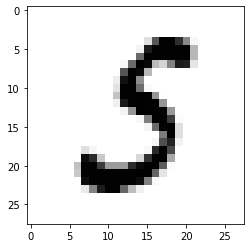

In [62]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()